In [11]:
#ref : http://machine-learning-python.kspax.io/Feature_Selection/ex6_univariate_feature_selection.html
#ref : http://scikit-learn.org/stable/modules/feature_selection.html
#ref : http://scikit-learn.org/stable/supervised_learning.html
#ref : http://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html#example-neighbors-plot-nearest-centroid-py

In [12]:
#import modules 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd, numpy as np 
%matplotlib inline
%pylab inline
import seaborn  as sns 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import datasets, svm
from sklearn.linear_model import SGDClassifier
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Index
# 1. Data overview
# 2. Classifier

# select data 

In [3]:

iris = datasets.load_iris()

X = iris.data
Y = iris.target

# 1. Data overview

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c94b438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cb2b1d0>]], dtype=object)

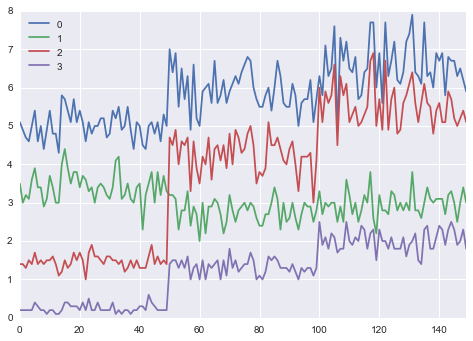

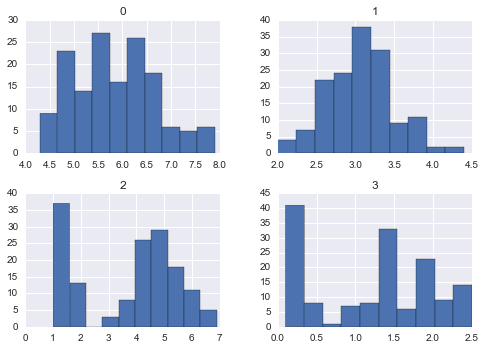

In [4]:
# line & histogram plot 
pd.DataFrame(X).plot()
pd.DataFrame(X).hist()



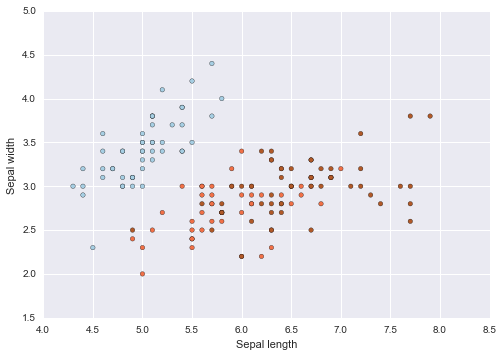

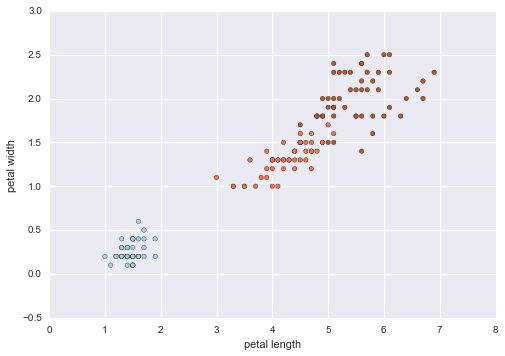

In [5]:
# scatter plot 

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.scatter(X[:, 2], X[:, 3], c=Y, cmap=plt.cm.Paired)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()


# 2. FEATURE SELECTION 

##  2.1 ExtraTreesClassifier

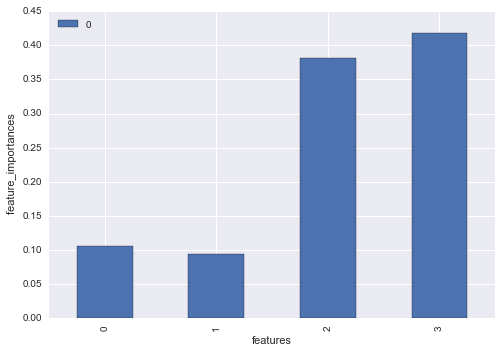

In [6]:
# ExtraTreesClassifier
iris = load_iris()
X, y = iris.data, iris.target
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_ 
pd.DataFrame(clf.feature_importances_).plot(kind='bar') 
pyplot.xlabel('features')
pyplot.ylabel(' feature_importances')

## 2.2  ADD NOISES 

<Container object of 24 artists>

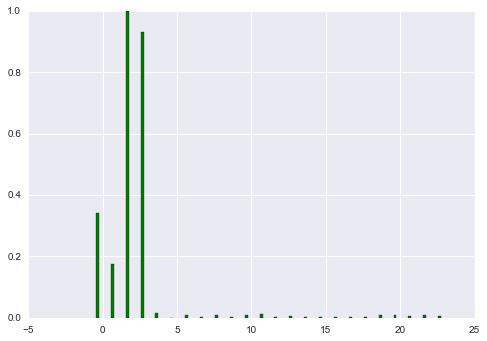

In [7]:
# add noises to data 
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))
X = np.hstack((iris.data, E))
y = iris.target
selector = SelectPercentile(f_classif, percentile=10)
X_indices = np.arange(X.shape[-1])
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

## 2.3 Compare weights via SVM

<Container object of 24 artists>

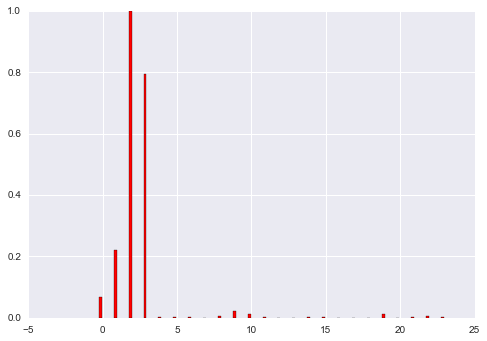

In [8]:
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()
plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')


# 2. Classifier

## 2.1  SVM Classifier  

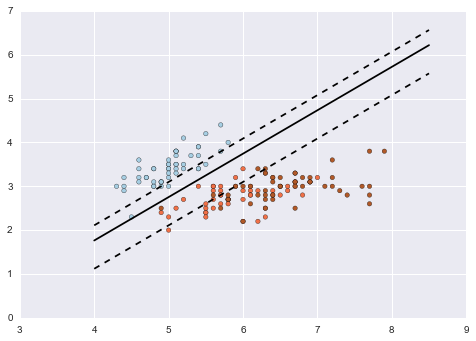

In [9]:

X = iris.data[:,:2]
Y = iris.target



clf = svm.SVC(kernel='linear')
clf.fit(X, Y)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 8.5)
yy = a * xx - (clf.intercept_[0]) / w[1]


b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)



## 2.2  SGD Classifier 

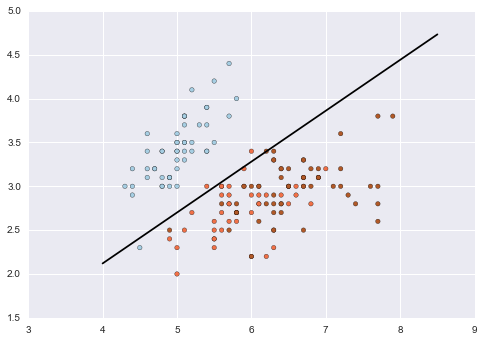

In [10]:
iris = datasets.load_iris()

X = iris.data[:,:2]
Y = iris.target


clf = SGDClassifier()

clf.fit(X, Y)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 8.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

# 2.3  Nearest Centroid Classification 

None 0.813333333333
0.1 0.813333333333


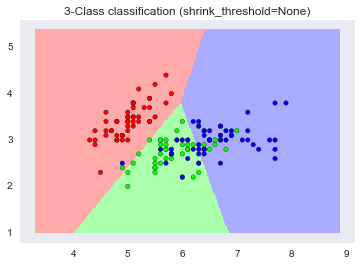

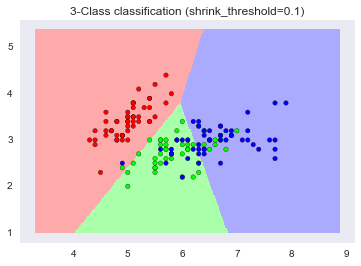

In [15]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps

for shrinkage in [None, 0.1]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()